In [1]:
import pandas as pd
from urllib.parse import urlparse

# CSVファイルのパス
csv_file_path = './data/access.csv'
# CSVファイルを読み込む
df = pd.read_csv(csv_file_path)

# URLに指定された文字列を含んでいるかどうか判定する関数
def filter_str(url):
    lower_url = url.lower()
    if 'zanbil.ir' in lower_url or 'znbl.ir' in lower_url or 'zanbil-ir' in lower_url:
        return '-'
    return url
# URLからドメイン名を抽出する関数
def get_domain(url):
    return urlparse(url).netloc if url != '-' else None

# リファラが空白でないデータをフィルタリングし、不要なドメインを除外
df['Referer'] = df['Referer'].dropna().apply(filter_str)
df_filtered = df[df['Referer'] != '-'].dropna()

# リファラからドメイン名を抽出
df_filtered['Referer_Domain'] = df_filtered['Referer'].apply(get_domain)

# リファラの頻度を計算
referer_counts = df_filtered['Referer'].value_counts()
referer_domain_counts = df_filtered['Referer_Domain'].value_counts()

print(len(referer_counts))
print(len(referer_domain_counts))

25848
358


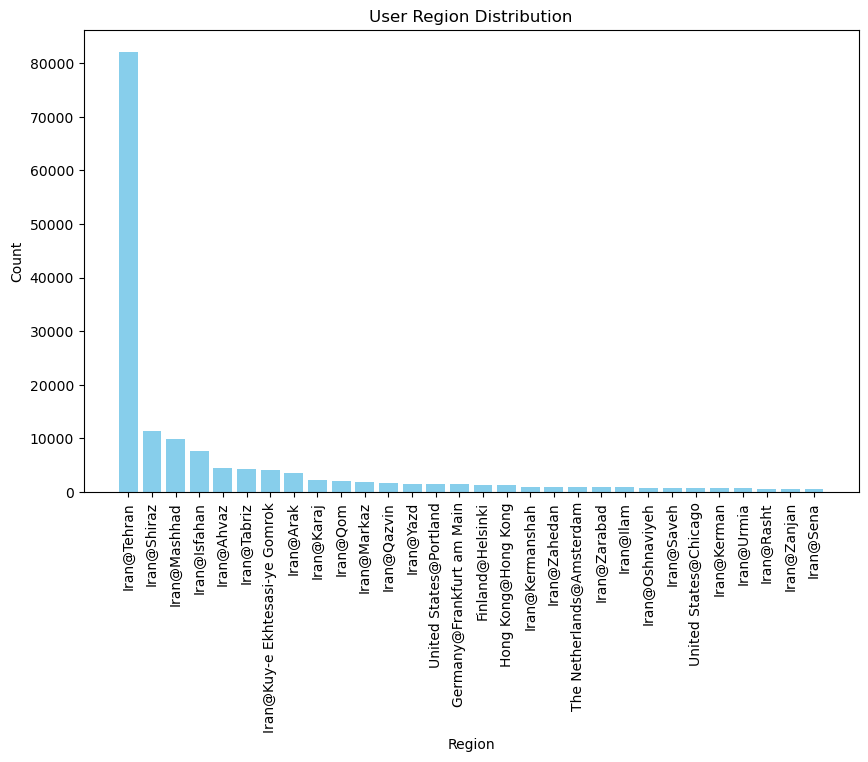

In [2]:


from itertools import islice
import geoip2.database
import numpy as np
import matplotlib.pyplot as plt
reader = geoip2.database.Reader('data/GeoLite2-City.mmdb')
# ユニークなIPアドレスの地域を特定する
unique_ips = df['IP'].unique()
array=[]
for ip in unique_ips:
    try:
        city=reader.city(ip)
        if city.country.name!=None and city.city.name!=None:
            array.append(city.country.name +'@'+city.city.name)
    except Exception as e:
        pass
region_counts = {}
for region in array:
    if region in region_counts:
        region_counts[region] += 1
    else:
        region_counts[region] = 1

sorted_regions = dict(sorted(region_counts.items(), key=lambda item: item[1], reverse=True)[:30])
# プロットを作成
plt.figure(figsize=(10, 6))
plt.bar(list(sorted_regions.keys()), list(sorted_regions.values()), color='skyblue')
plt.title('User Region Distribution')
plt.xlabel('Region')
plt.xticks(rotation=90) 
plt.ylabel('Count')
plt.show()


In [ ]:
country_counts = {}
for region in array:
    country = region.split('@')[0]
    if country in country_counts:
        country_counts[country] += 1
    else:
        country_counts[country] = 1

sorted_countries = dict(sorted(country_counts.items(), key=lambda item: item[1], reverse=True))
# 国別割合をプロット
plt.figure(figsize=(10, 6))
plt.pie(sorted_countries.values(), labels=sorted_countries.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('User Country Distribution')
plt.show()